<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [1]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [2]:
# Read in the citibike data in the data folder in this repository.
citibike_df = pd.read_csv('data/citibike_feb2014.csv')

## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [3]:
# see first five rows

citibike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [4]:
# check for any null values

citibike_df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [5]:
# rename columns

citibike_df.columns = ['trip_duration',
                    'start_time',
                    'stop_time',
                    'start_stn_id',
                    'start_stn_name',
                    'start_stn_lat',
                    'start_stn_long',
                    'end_stn_id',
                    'end_stn_name',
                    'end_stn_lat',
                    'end_stn_long',
                    'bike_id',
                    'user_type',
                    'birth_year',
                    'gender']

citibike_df.head()

,trip_duration,start_time,stop_time,start_stn_id,start_stn_name,start_stn_lat,start_stn_long,end_stn_id,end_stn_name,end_stn_lat,end_stn_long,bike_id,user_type,birth_year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


## Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

In [6]:
# check for all gender values

citibike_df['gender'].value_counts()

gender
1    176526
2     41479
0      6731
Name: count, dtype: int64

**Null Hypothesis:** Average trip duration is not affected by gender.

**Alternative Hypothesis:** Average trip duration is affected by gender.

We will conduct this test assuming $\alpha=0.05$.

In [7]:
ttest_ind(citibike_df[citibike_df['gender'] == 1]['trip_duration'],
          citibike_df[citibike_df['gender'] == 2]['trip_duration'])

TtestResult(statistic=-5.929304472651931, pvalue=3.0467626856603033e-09, df=218003.0)

**Answer:**
- Since p-value is much smaller than the level of significance (0.05), we reject the null hypothesis.
- Therefore, we accept the alternative hypothesis that average trip duration is affected by gender. 

## What numeric columns shouldn't be treated as numeric?

**Answer:**
`start_stn_id`, `end_stn_id`, and `bike_id`

## Dummify the `start_stn_id` Variable

In [8]:
# check for number of unique start_stn_id

len(set(citibike_df['start_stn_id']))

329

In [9]:
# check for original number of columns

len(citibike_df.columns)

15

In [10]:
# dummify
# there should be 329+15-1-1 = 342 columns
# -1 for the original 'start_stn_id' column
# -1 for drop_first=True (first start_stn_id dummy column removed)

citibike_df = pd.get_dummies(citibike_df,
                             columns=['start_stn_id'],
                             drop_first=True)

citibike_df.head() # 342 columns

,trip_duration,start_time,stop_time,start_stn_name,start_stn_lat,start_stn_long,end_stn_id,end_stn_name,end_stn_lat,end_stn_long,...,start_stn_id_2006,start_stn_id_2008,start_stn_id_2009,start_stn_id_2010,start_stn_id_2012,start_stn_id_2017,start_stn_id_2021,start_stn_id_2022,start_stn_id_2023,start_stn_id_3002
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,False,False,False,False,False,False,False,False,False,False
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,False,False,False,False,False,False,False,False,False,False
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,False,False,False,False,False,False,False,False,False,False
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,False,False,False,False,False,False,False,False,False,False
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,False,False,False,False,False,False,False,False,False,False


## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

In [11]:
citibike_df['birth_year'].value_counts()

birth_year
1985    9305
1984    9139
1983    8779
1981    8208
1986    8109
        ... 
1910       4
1917       3
1927       2
1921       1
1913       1
Name: count, Length: 78, dtype: int64

In [12]:
citibike_df['birth_year'].describe() # dtype object

count     224736
unique        78
top         1985
freq        9305
Name: birth_year, dtype: object

In [13]:
set(citibike_df['birth_year']) # contains '\\N'

{'1899',
 '1900',
 '1901',
 '1907',
 '1910',
 '1913',
 '1917',
 '1921',
 '1922',
 '1926',
 '1927',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '\\N'}

In [14]:
# convert birth_year to int if possible

for year in citibike_df['birth_year']:
    try:
        int(year)
    except:
        print(year)

\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\N
\

In [15]:
# check for number of rows with '\\N'

citibike_df[citibike_df['birth_year'] == '\\N'].shape # 6717 rows

(6717, 342)

In [16]:
# replace all '\N' values with NaN

citibike_df.loc[citibike_df['birth_year'] == '\\N','birth_year'] = np.nan
citibike_df['birth_year'].isna().sum() # successfully replaced all 6717 rows with '\N'

6717

In [17]:
# convert all valid years to integers

citibike_df.loc[citibike_df['birth_year'].notnull(), 'birth_year'] = citibike_df.loc[citibike_df['birth_year'].notnull(), 'birth_year'].apply(int)

In [18]:
# create 'age' column

citibike_df['age'] = citibike_df['birth_year'].map(lambda year: 2014 - int(year) if isinstance(year, int) else np.nan)

In [19]:
# check age values

citibike_df['age'].value_counts()

age
29.0     9305
30.0     9139
31.0     8779
33.0     8208
28.0     8109
         ... 
104.0       4
97.0        3
87.0        2
93.0        1
101.0       1
Name: count, Length: 77, dtype: int64

In [20]:
# see updated df

citibike_df.head()

,trip_duration,start_time,stop_time,start_stn_name,start_stn_lat,start_stn_long,end_stn_id,end_stn_name,end_stn_lat,end_stn_long,...,start_stn_id_2008,start_stn_id_2009,start_stn_id_2010,start_stn_id_2012,start_stn_id_2017,start_stn_id_2021,start_stn_id_2022,start_stn_id_2023,start_stn_id_3002,age
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,False,False,False,False,False,False,False,False,False,23.0
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,False,False,False,False,False,False,False,False,False,35.0
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,False,False,False,False,False,False,False,False,False,66.0
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,False,False,False,False,False,False,False,False,False,33.0
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,False,False,False,False,False,False,False,False,False,24.0


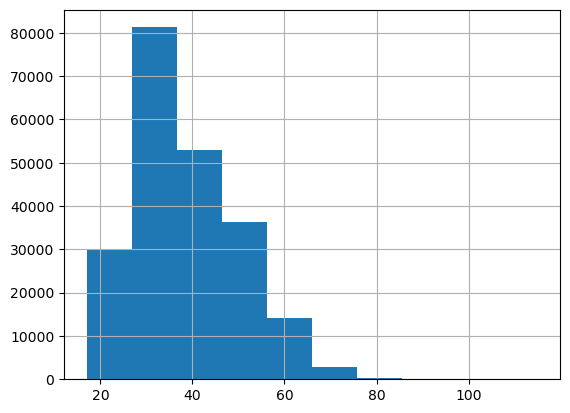

In [21]:
# see if age and birth_year match up

citibike_df['age'].hist();

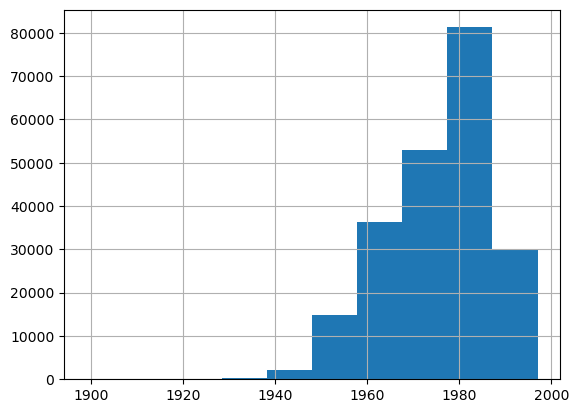

In [22]:
# see if age and birth_year match up

citibike_df['birth_year'].dropna().hist();

## Split your data into train/test data

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

Use the `trip_duration` column as your `y` variable.

For your `X` variables, use `age`, `user_type`, `gender`, and the dummy variables you created from `start_stn_id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

**NOTE:** When doing your train/test split, please use random seed 123.

**Answer:**
The 80:20 train/test split is used as it strikes a balance between having enough data for training and a sufficiently large testing set for reliable evaluation.

In [23]:
# check 'user_type' values
citibike_df['user_type'].value_counts()

user_type
Subscriber    218019
Customer        6717
Name: count, dtype: int64

In [24]:
# check total number of columns
citibike_df.shape

(224736, 343)

In [25]:
# dummify 'user_type' column
# there should be 343+2-1 = 344 columns
# -1 for the original 'user_type' column

citibike_df = pd.get_dummies(citibike_df,
                             columns=['user_type'])

citibike_df.replace({False: 0, True: 1}, inplace=True)

citibike_df.head()

,trip_duration,start_time,stop_time,start_stn_name,start_stn_lat,start_stn_long,end_stn_id,end_stn_name,end_stn_lat,end_stn_long,...,start_stn_id_2010,start_stn_id_2012,start_stn_id_2017,start_stn_id_2021,start_stn_id_2022,start_stn_id_2023,start_stn_id_3002,age,user_type_Customer,user_type_Subscriber
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,23.0,0,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,35.0,0,1
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,66.0,0,1
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,33.0,0,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,24.0,0,1


In [26]:
#create X and y variables

# retain age, user_type, gender, start_stn_id dummies
X = citibike_df.dropna().drop(columns=['trip_duration',
                                       'birth_year',
                                       'bike_id',
                                       'end_stn_long', 'end_stn_lat', 'end_stn_name', 'end_stn_id',
                                       'start_stn_long', 'start_stn_lat', 'start_stn_name', 'start_time',
                                       'stop_time'])

# trip_duration
y = citibike_df.dropna()['trip_duration']

In [27]:
# create train and test models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,gender,start_stn_id_79,start_stn_id_82,start_stn_id_83,start_stn_id_116,start_stn_id_119,start_stn_id_120,start_stn_id_127,start_stn_id_128,start_stn_id_137,...,start_stn_id_2010,start_stn_id_2012,start_stn_id_2017,start_stn_id_2021,start_stn_id_2022,start_stn_id_2023,start_stn_id_3002,age,user_type_Customer,user_type_Subscriber
202211,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27.0,0,1
91538,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,44.0,0,1
119533,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,56.0,0,1
8226,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25.0,0,1
181286,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,33.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122635,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,38.0,0,1
106311,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,34.0,0,1
134912,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,45.0,0,1
151222,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,41.0,0,1


In [29]:
X_test

,gender,start_stn_id_79,start_stn_id_82,start_stn_id_83,start_stn_id_116,start_stn_id_119,start_stn_id_120,start_stn_id_127,start_stn_id_128,start_stn_id_137,...,start_stn_id_2010,start_stn_id_2012,start_stn_id_2017,start_stn_id_2021,start_stn_id_2022,start_stn_id_2023,start_stn_id_3002,age,user_type_Customer,user_type_Subscriber
109692,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,37.0,0,1
826,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,49.0,0,1
105130,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,44.0,0,1
181327,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,30.0,0,1
104428,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,28.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160238,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,29.0,0,1
33178,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,34.0,0,1
130173,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,34.0,0,1
29059,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,56.0,0,1


In [30]:
y_train

202211      335
91538     66824
119533     1316
8226        311
181286      697
          ...  
122635      266
106311      864
134912     1086
151222      466
124777     1798
Name: trip_duration, Length: 174415, dtype: int64

In [31]:
y_test

109692     952
826        223
105130     534
181327     414
104428    1445
          ... 
160238     876
33178      453
130173    2419
29059      411
46432     1759
Name: trip_duration, Length: 43604, dtype: int64

## Fit a Linear Regression model in `sklearn` predicting `trip_duration`.

In [32]:
# Step 1. Instantiate the model.
model = LinearRegression()

# Step 2. Fit the model on the training data.
model.fit(X_train, y_train)

# Step 3. Generate predictions.
preds = model.predict(X_test)

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [33]:
# Check the MSE on the training and testing sets.

MSE_train_score = mean_squared_error(y_train, model.predict(X_train))
MSE_test_score = mean_squared_error(y_test, preds)

print(f'MSE on training set: {MSE_train_score}')
print(f'MSE on testing set: {MSE_test_score}')

MSE on training set: 28402575.46751246
MSE on testing set: 36219564.97888505


In [34]:
# Check the RMSE on the training and testing sets.

RMSE_train_score = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
RMSE_test_score = np.sqrt(mean_squared_error(y_test, preds))

print(f'Root MSE on training set: {RMSE_train_score}')
print(f'Root MSE on testing set: {RMSE_test_score}')

Root MSE on training set: 5329.406671245164
Root MSE on testing set: 6018.269267728476


In [35]:
# Check the R^2 on the training and testing sets.

R2_train_score = r2_score(y_train, model.predict(X_train))
R2_test_score = r2_score(y_test, preds)

print(f'R^2 on training set: {R2_train_score}')
print(f'R^2 on testing set: {R2_test_score}')

R^2 on training set: 0.004324661408005248
R^2 on testing set: -0.002850152664226613


**Answer:**
Since the R^2 score is not close to 1, the model is unable to capture the relationship between the features and the target variable accurately. The model is an underfit as reflected in the large test and train MSE scores.

## Fit a Linear Regression model in `statsmodels` predicting `trip_duration`.

## Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `trip_duration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

**Null Hypothesis, $H_0$:**
Age of citibike rider influences trip duration on the citibike.

**Alternative Hypothesis, $H_A$:**
Age of citibike rider does not influence trip duration on the citibike.

In [36]:
# Add a constant in statsmodels
X_train = sm.add_constant(X_train)

In [37]:
# Implement Ordinary Least Squares (OLS) method of linear regression
model_sm = sm.OLS(y_train, X_train).fit()

**Answer:**
- We conduct this test assuming that $\alpha=0.05$.
- Since the $p$-value for age (found in the summary table below) is less than $\alpha$ = 0.05, we reject the null hypothesis $H_0$.
- Hence, we accept our alternative hypothesis, $H_A$, and accept that age of rider influences trip duration on the citibike.

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

**Answer:**
- Based on the summary table below, the positive coefficient for `age` (5.29) shows that it contributes significantly to `trip_duration`.
- This means that as `age` increases, `trip_duration` increases.
- Hence, Citi Bike should market towards riders of older age.
- While `gender` also has a strongly positive coefficient (203.43), we do not know what `gender=2` means. There is not enough information to make a decision based on `gender`.
- Lastly, since the $R^2$ values are bad and the predicted values are not close to the actual values, Citi Bike should consider improving the model or using a different model entirely before making any decisions.

In [38]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.291
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           2.36e-35
Time:                        15:09:56   Log-Likelihood:            -1.7441e+06
No. Observations:              174415   AIC:                         3.489e+06
Df Residuals:                  174084   BIC:                         3.492e+06
Df Model:                         330                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
gender                 203.4294     32.867      6.189      0.000     139.010     267.849
start_stn_id_79         39.7925    336.224      0.118      0.906    -619.199     698.784
start_stn_id_82        361.7961    434.176      0.833      0.405    -489.179    1212.771
start_stn_id_83       -202.9586    423.462     -0.479      0.632   -1032.935     627.018
start_stn_id_116      -353.6422    287.617     -1.230      0.219    -917.365     210.081
start_stn_id_119      -351.5975    829.800     -0.424      0.672   -1977.986    1274.791
start_stn_id_120      -252.5729    698.073     -0.362      0.717   -1620.780    1115.634
start_stn_id_127      -328.8353    304.022     -1.082      0.279    -924.711     267.040
start_stn_id_128      -341.4133    295.349     -1.156      0.248    -920.291     237.464
start_stn_id_137      -361.1470    361.695     -0.998      0.318   -1070.061     347.767
start_stn_id_143      -324.6880    498.405     -0.651      0.515   -1301.551     652.175
start_stn_id_144       -76.4612    702.813     -0.109      0.913   -1453.959    1301.036
start_stn_id_146      -466.3042    351.975     -1.325      0.185   -1156.168     223.560
start_stn_id_147      -108.2668    309.644     -0.350      0.727    -715.163     498.629
start_stn_id_150       203.1144    353.867      0.574      0.566    -490.457     896.686
start_stn_id_151      -394.7685    277.310     -1.424      0.155    -938.291     148.754
start_stn_id_152      -401.4983    392.329     -1.023      0.306   -1170.454     367.457
start_stn_id_153      -395.5612    301.814     -1.311      0.190    -987.110     195.988
start_stn_id_157        49.8455    417.969      0.119      0.905    -769.365     869.056
start_stn_id_160      -159.1858    334.880     -0.475      0.635    -815.543     497.171
start_stn_id_161      -416.6042    295.419     -1.410      0.158    -995.618     162.410
start_stn_id_164      -248.2181    330.187     -0.752      0.452    -895.377     398.941
start_stn_id_167      -232.4781    305.177     -0.762      0.446    -830.619     365.663
start_stn_id_168      -297.0126    288.463     -1.030      0.303    -862.395     268.369
start_stn_id_173      -370.6901    305.739     -1.212      0.225    -969.931     228.550
start_stn_id_174       363.2711    319.318      1.138      0.255    -262.584     989.126
start_stn_id_195       408.3429    328.007      1.245      0.213    -234.543    1051.229
start_stn_id_212      -254.1424    304.249     -0.835      0.404    -850.464     342.179
start_stn_id_216      -255.6515    776.779     -0.329      0.742   -1778.121    1266.818
start_stn_id_217         8.6294    659.982      0.013      0.990   -1284.921    1302.180
start_stn_id_218       302.5221    763.616      0.396      0.692   -1194.149    1799.193
start_stn_id_223      -147.6685    311.945     -0.473    